In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/scripts/')
import HSCMeasurementUtils as hmu
import sacc
import healsparse
import healpy as hp

# Notebook Index

1. [Introduction](#introduction)
2. [Dataframe Creation](#dataframe-creation)
3. [Plotting the Dataframe](#plotting-the-dataframe)
4. [Footprint / Mask](#footprint-mask)
5. [Photometric Redshift Distribution](#photometric-redshift-distribution)
6. [True Photo-z Stacking](#true-photo-z-stacking)
7. [Ephor_AB Photo-z Estimation](#ephor-ab-photo-z-estimation)
8. [Angular Power Spectra](#angular-power-spectra)
9. [Cosmic Shear Cross-checks](#cosmic-shear-cross-checks)
10. [Cosmic Shear](#cosmic-shear)
11. [Galaxy Clustering](#galaxy-clustering)
    1. [Clustering with S16A Sample](#clustering-with-s16a-sample)
    2. [Clustering with DR1](#clustering-with-dr1)
12. [Conclusion](#conclusion)


## Footprint / Mask

>> Saving figure ...
/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/figures/measurements/clustering/mask/mask.pdf


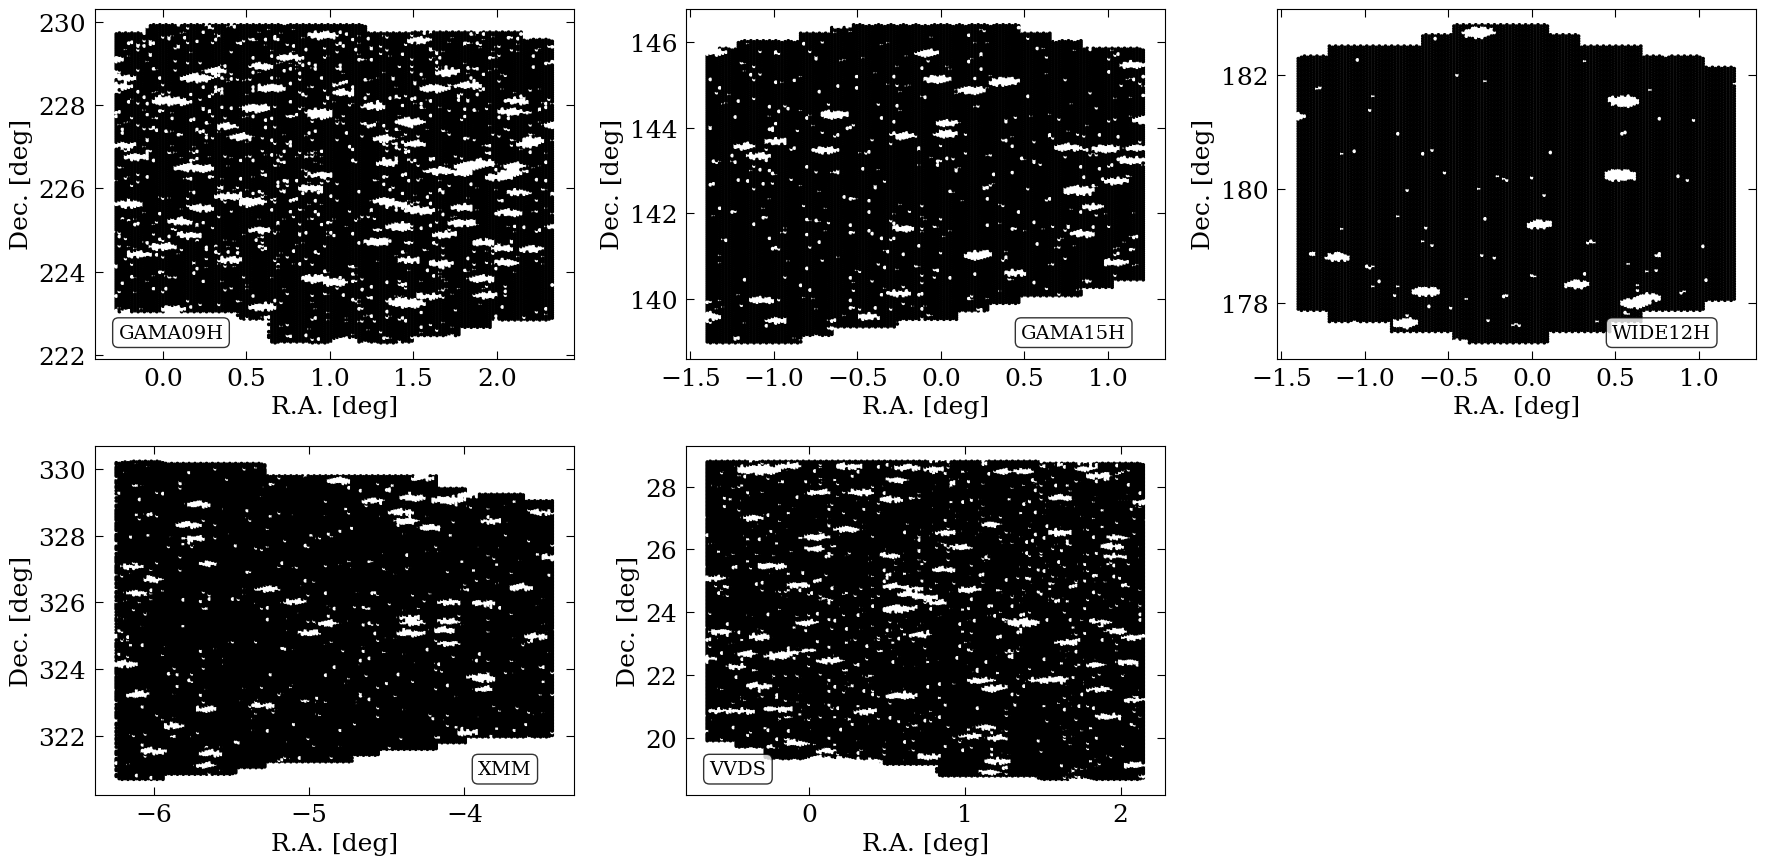

In [5]:
path = '/global/cfs/projectdirs/lsst/groups/LSS/HSC_reanalysis/data_javi/lens_sample_2023_pdr1'
path_aux = '/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/data/mask/star_snr10_imag245'
savepath = '/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/figures/measurements/clustering/mask'

mask_type = 'star_snr10_imag245'
nside = 2048

# HSC Fields
label_list = ['gama09h', 'gama15h', 'wide12h', 'xmm', 'vvds']

# Initialize an empty matplotlib figure with 2 rows and 3 columns in the top tow and 2 columns in the bottom row
fig, axs = plt.subplots(2, 3, figsize=(18, 9))

# Increase the horizontal separation between the plots
fig.subplots_adjust(hspace = 0.3, wspace=0.3)

# Iterate over fields
for label in label_list:
    if label == 'gama09h':
        # Plot position
        pind = (0,0)
        # Text position
        x,y = (0.05, 0.1)
    elif label == 'gama15h':
        pind = (0,1)
        x,y = (0.7, 0.1)
    elif label == 'wide12h':
        pind = (0,2)
        x,y = (0.7, 0.1)
    elif label == 'xmm':
        pind = (1,0)
        x,y = (0.8, 0.1)
    elif label == 'vvds':
        pind = (1,1)
        x,y = (0.05, 0.1)
    # Compose the filename
    fname = os.path.join(path_aux, f'mask_{mask_type}_nside{nside}_{label}.hs')
    # Read the mask
    mask = healsparse.HealSparseMap.read(fname)
    # Get the pixels
    pixels = mask.valid_pixels
    # Get the mask values
    mask_values = mask[pixels]
    # Convert pixels to ring ordering
    pixels = hp.nest2ring(nside, pixels)
    # Convert pixel to ra and dec using the HSCMeasurementUtils
    ra, dec = HSCMeasurementUtils.IndexToDeclRa(index = pixels,nside=nside)

    # Plot ra and dec with a scatter plot and using mask_values in black and white
    axs[pind].scatter(ra, dec, c=mask_values, s=3, cmap='binary')
    # Xlabel
    axs[pind].set_xlabel('R.A. [deg]')
    axs[pind].set_ylabel('Dec. [deg]')
    # Write the name of the field, which is the label, in capital letters inside the plot
    # as text and not overlapping with the scatter plot 
    axs[pind].text(x, y, label.upper(), transform=axs[pind].transAxes, fontsize=14,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Remove the last plot
fig.delaxes(axs[1,2])
# Center the plots
fig.tight_layout()

print(">> Saving figure ...")
print(os.path.join(savepath, 'mask.pdf'))

plt.savefig(os.path.join(savepath, 'mask.png'),
             dpi=300,
             bbox_inches='tight')
plt.savefig(os.path.join(savepath, 'mask.pdf'),
             dpi=300,
             bbox_inches='tight')


## Photometric redshift distribution

In [2]:
fname = '/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/data/harmonic/txpipe/combined/summary_statistics_fourier_ivw.sacc'
s = sacc.Sacc.load_fits(fname)

In [3]:
savepath = '/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/figures/redshift-distribution'

### True photo-z stacking for the lenses (Wrong!!)

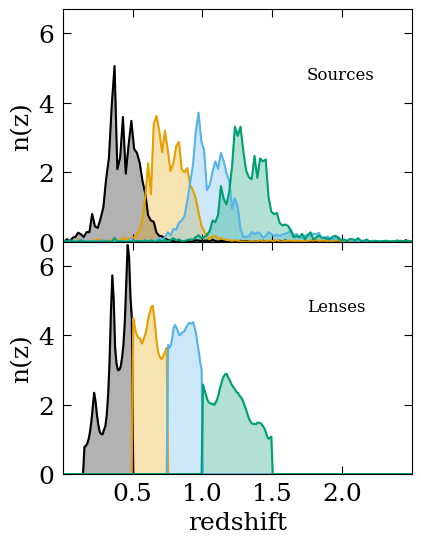

()

In [4]:
HSCMeasurementUtils.RedshiftDistr_plot(sacc = s,
                                       savepath = savepath)

### Ephor_AB photo-z estimation for the lenses (Fiducial)

pz_mc_eab


>> Saving figure...
/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/figures/measurements/redshift_distribution/dndz_pz_mc_eab.pdf


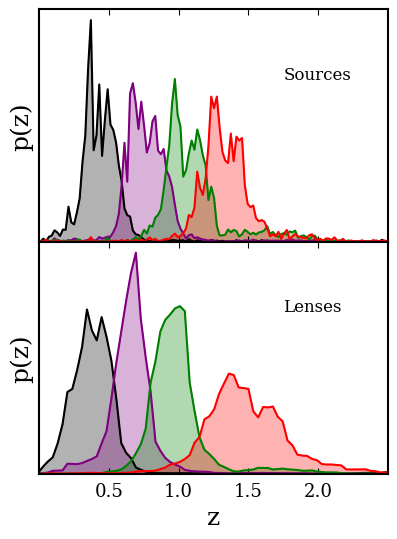

pz_mc_frz
>> Saving figure...
/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/figures/measurements/redshift_distribution/dndz_pz_mc_frz.pdf


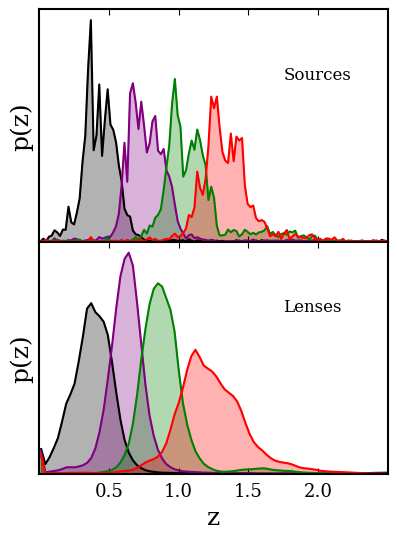

pz_mc_nnz
>> Saving figure...
/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/figures/measurements/redshift_distribution/dndz_pz_mc_nnz.pdf


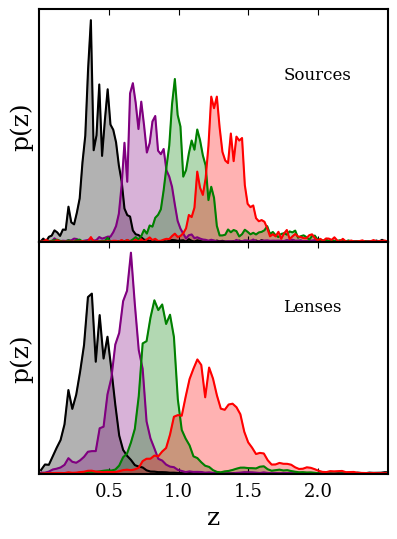

In [2]:
pz_method_array = ['pz_mc_eab', 'pz_mc_frz', 'pz_mc_nnz']

for pz_method in pz_method_array:
    print(pz_method)
    fname = os.path.join(f'/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/data/harmonic/txpipe/source_s16a_lens_dr1/all-fields/dndz/summary_statistics_fourier_all_SourcesS16A_LensesDR1_{pz_method}.sacc')
    s = sacc.Sacc.load_fits(fname)

    hmu.RedshiftDistr_plot(sacc = s,
                           label = pz_method,
                           savepath = '/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/figures/measurements/redshift_distribution')

## Angular power spectra

### Cosmic shear cross-checks

>>  Cosmic shear - Hikage et al.
>>  Cosmic shear - Nicola et al.


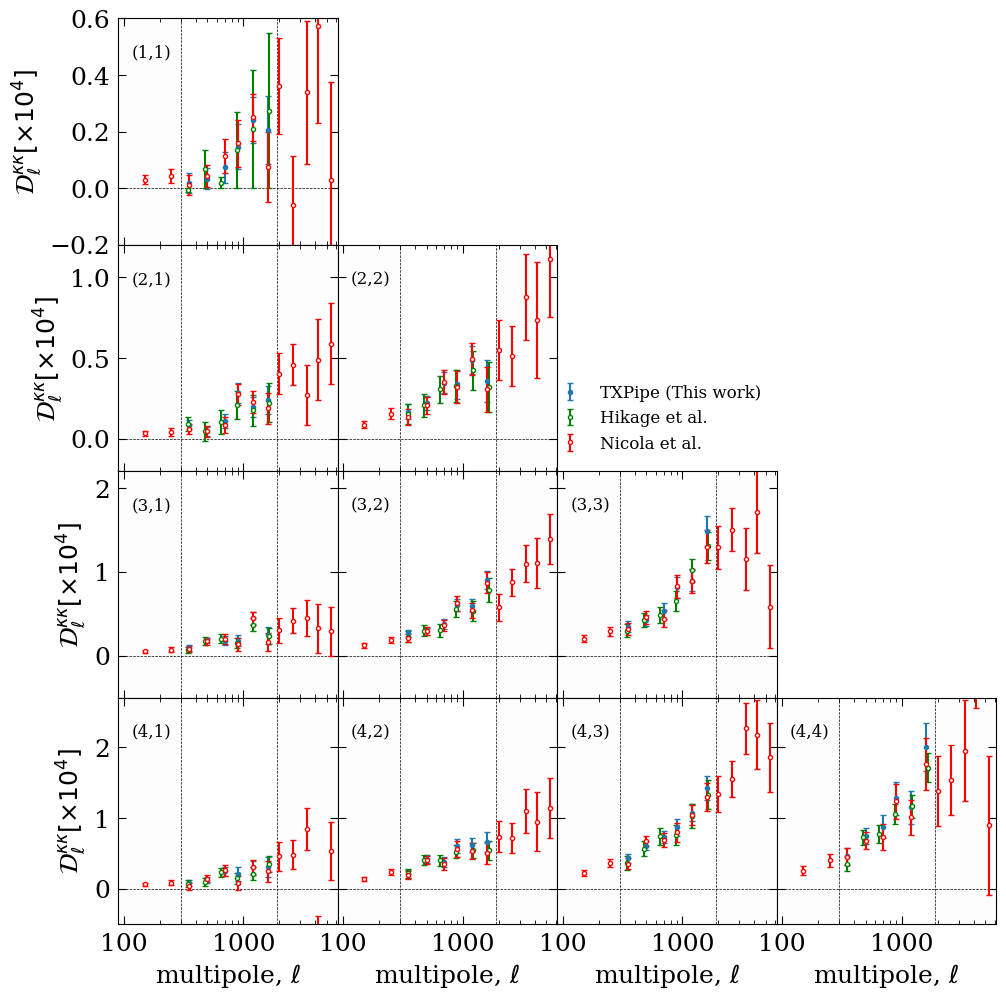

()

In [4]:
hmu.Shear2pt_plot(fname = ['/pscratch/sd/d/davidsan/txpipe-reanalysis/hsc/outputs/ivw/summary_statistics_fourier_ivw_HikageShearSC.sacc'],
                    labels = ['TXPipe (This work)'],
                    add_individual = True,
                    add_combined = False,
                    add_literature=True,
                    add_Hikage_sacc=False,
                    theory_fname=None,
                    just_auto = False,
                    save_fig=False)

>>  Cosmic shear - Hikage et al.
>>  Cosmic shear - Nicola et al.


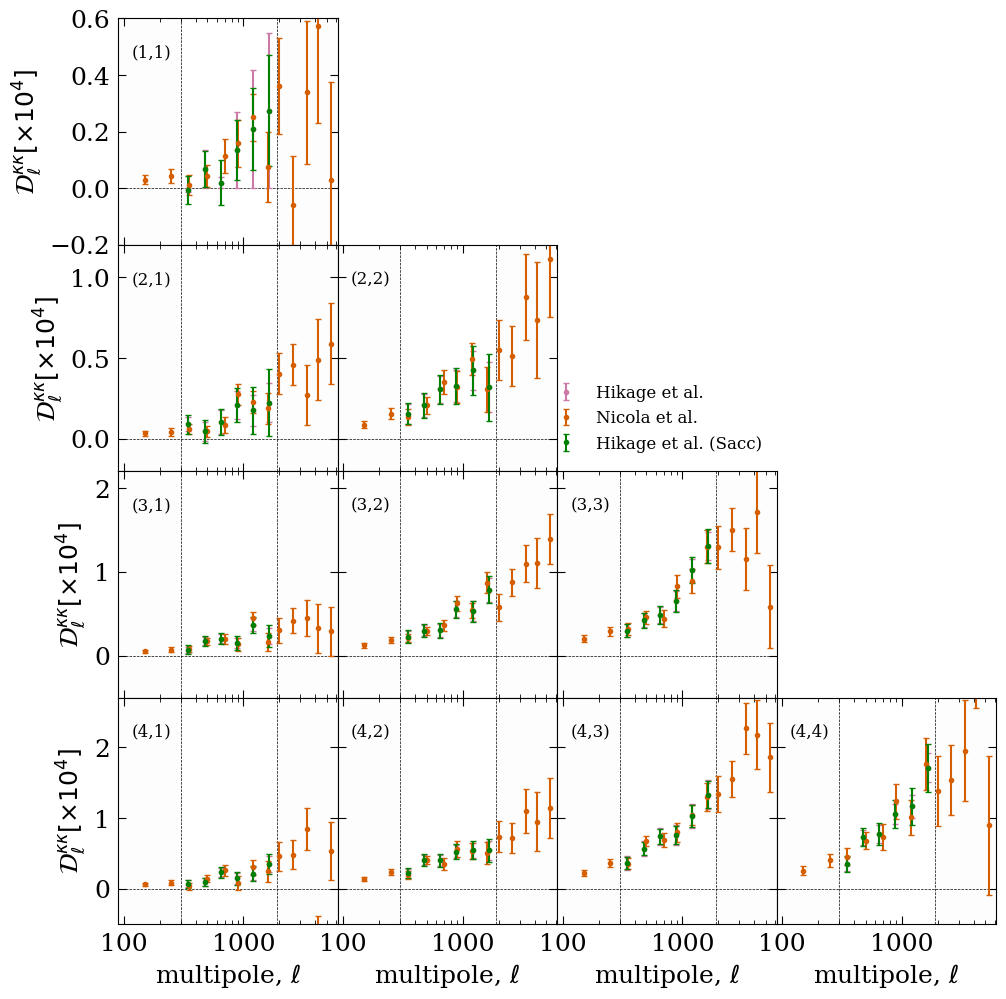

()

In [2]:
hmu.Shear2pt_plot(fname = ['/global/cfs/projectdirs/lsst/groups/LSS/HSC_reanalysis/data_javi/cls_hscpdr1_hikage_wcov_cholesky.sacc'],
                    labels = ['Hikage et al. signal in Sacc'],
                    add_individual = False,
                    add_combined = False,
                    add_literature=True,
                    add_Hikage_sacc=True,
                    theory_fname=None,
                    just_auto = False,
                    save_fig=False)

<< Chisq calculation >>
Data: (0, 0)
Data: (1, 0)
Data: (1, 1)
Data: (2, 0)
Data: (2, 1)
Data: (2, 2)
Data: (3, 0)
Data: (3, 1)
Data: (3, 2)
Data: (3, 3)
Theory: (0, 0)
Theory: (1, 0)
Theory: (1, 1)
Theory: (2, 0)
Theory: (2, 1)
Theory: (2, 2)
Theory: (3, 0)
Theory: (3, 1)
Theory: (3, 2)
Theory: (3, 3)
Chisq = 67.29
Chisq / ndof = 1.4


/opt/desc/py/lib/python3.10/site-packages/sacc/sacc.py:376: UserWarning: Empty index selected
  warnings.warn("Empty index selected")


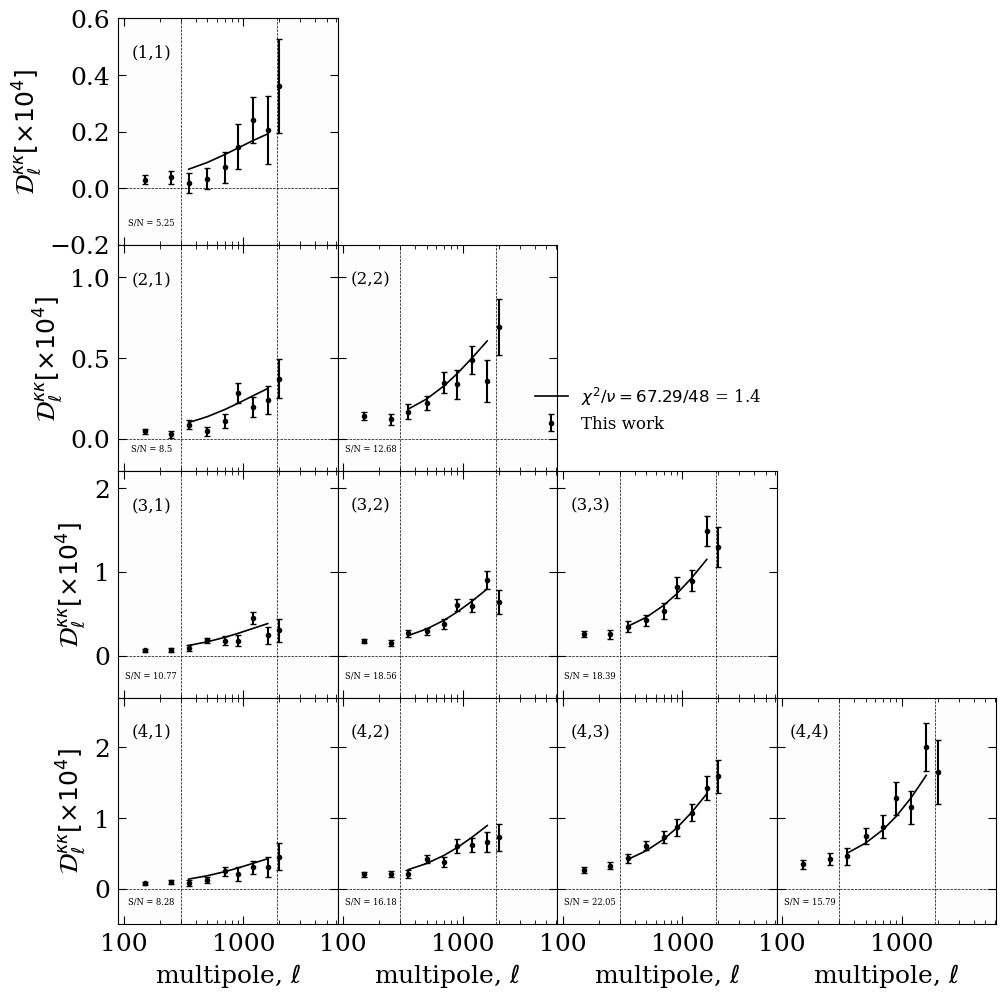

()

In [3]:
HSCMeasurementUtils.Shear2pt_plot(fname = [None],
                                  labels = [None],
                                  add_individual = False,
                                  add_combined = 'ivw',
                                  add_literature=False,
                                  add_Hikage_sacc=False,
                                  theory_fname='/pscratch/sd/d/davidsan/new_firecrown/firecrown/examples/hsc_3x2pt/cosmicshear/output/cosmicshear_multinest_txpipe_with_systematics_30102023/test/data_vector',
                                  just_auto = False,
                                  save_fig=False)

### Cosmic shear

>>  Cosmic shear - Hikage et al.
>>  Cosmic shear - Nicola et al.
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Saving figure ...
 Path:  /pscratch/sd/d/davidsan/HSC-PDR1-3x

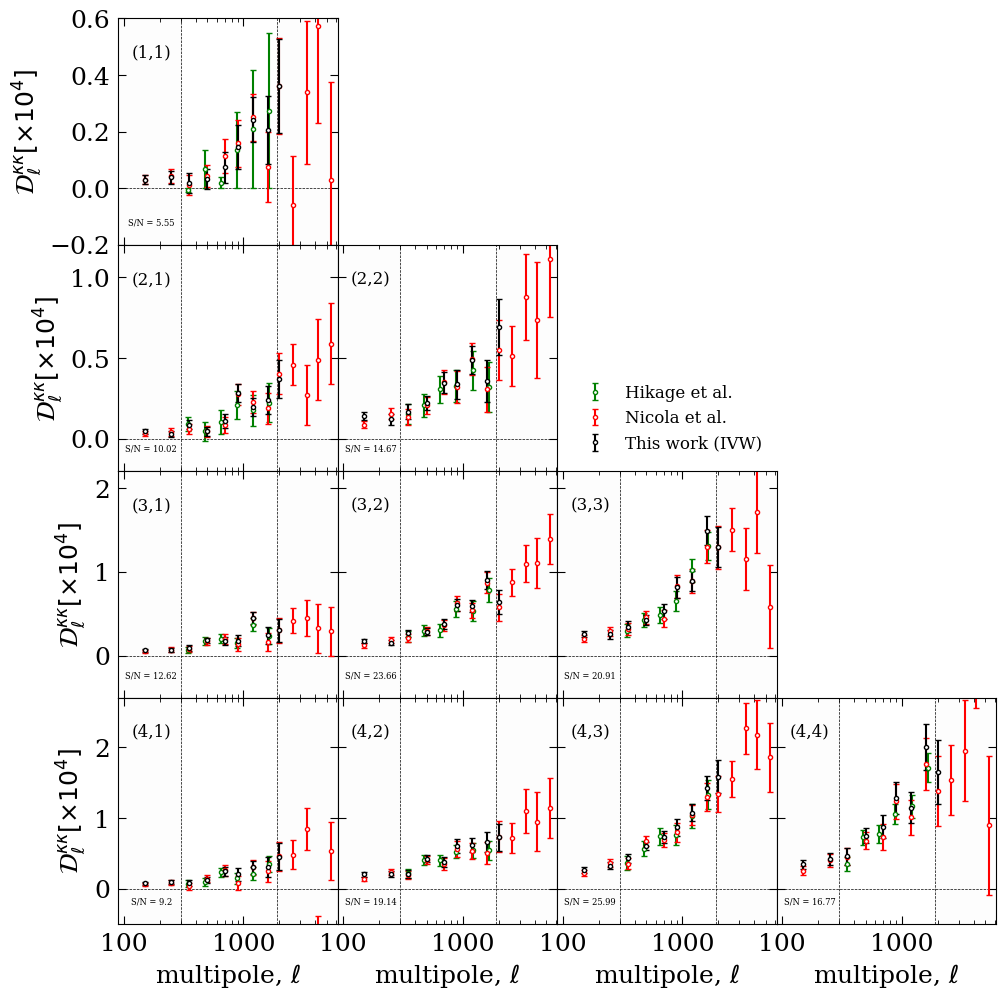

()

In [2]:
hmu.Shear2pt_plot(fname = [None],
                  labels = [None],
                  add_individual = False,
                  add_combined = 'ivw',
                  add_allfields=False,
                  add_literature=True,
                  add_Hikage_sacc=False,
                  theory_fname=None,
                  just_auto = False,
                  save_fig=True)

Comparison of our TXPipe measurements: signal obtained from the measurement on the 5 different patches at the same time versus the combined measurement of the patches individually and then combined via inverse variance weighting.

>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample


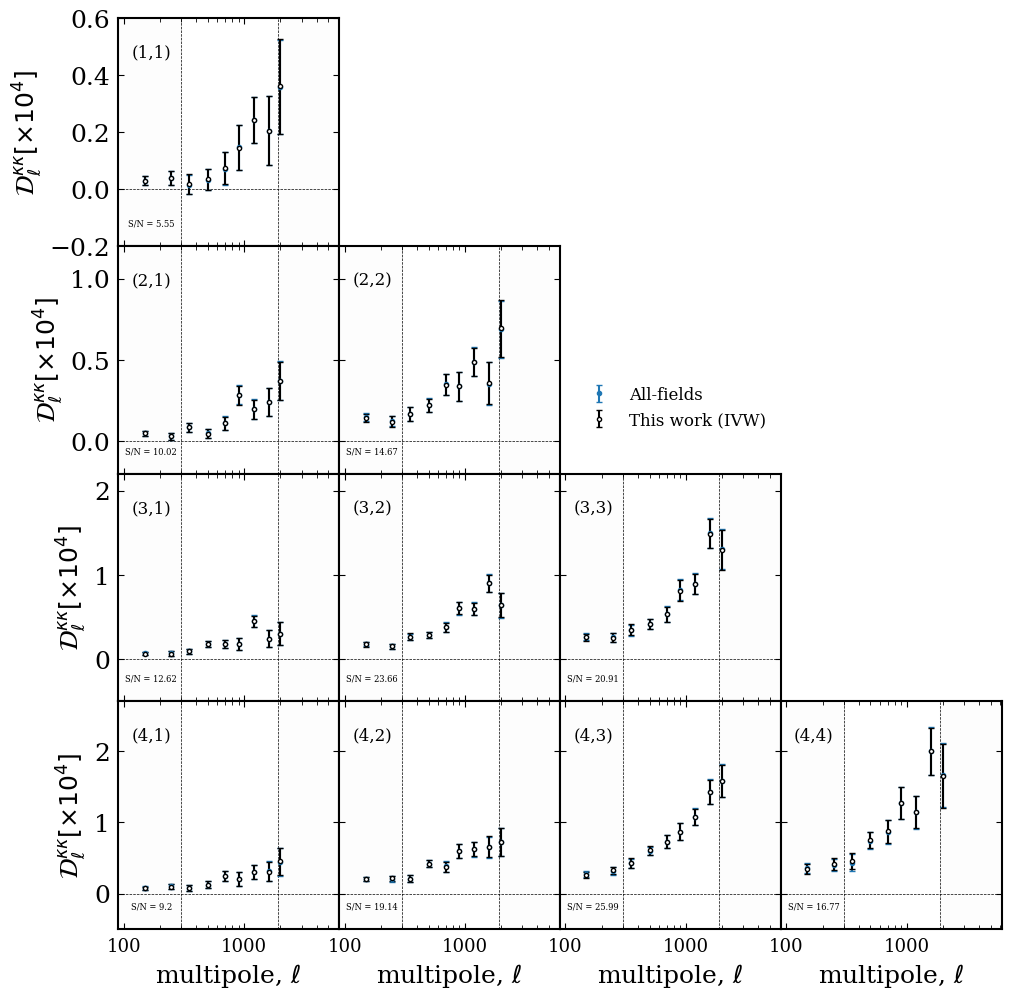

()

In [3]:
hmu.Shear2pt_plot(fname = ['/pscratch/sd/d/davidsan/txpipe-reanalysis/hsc/outputs/outputs_all/summary_statistics_fourier.sacc'],
                  labels = ['All-fields'],
                  add_individual = True,
                  add_combined = 'ivw',
                  add_allfields=False,
                  add_literature=False,
                  add_Hikage_sacc=False,
                  theory_fname=None,
                  just_auto = False,
                  save_fig=False)

Checking that both measurements are not identical.

In [10]:
fname_all = '/pscratch/sd/d/davidsan/txpipe-reanalysis/hsc/outputs/outputs_all/twopoint_data_fourier.sacc'
s_all = sacc.Sacc.load_fits(fname_all)

fname_ivw = '/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/data/harmonic/txpipe/source_s16a_lens_dr1/combined/summary_statistics_fourier_ivw.sacc'
s_ivw = sacc.Sacc.load_fits(fname_ivw)

In [16]:
for i in np.arange(4):
    for j in np.arange(4):
        if i >= j:
            _, Cell_all = s_all.get_ell_cl('galaxy_shear_cl_ee', f'source_{i}', f'source_{j}', return_cov=False)
            _, Cell_ivw = s_ivw.get_ell_cl('galaxy_shear_cl_ee', f'source_{i}', f'source_{j}', return_cov=False)
            print(f'{i,j}, mean(diff(Cell)) = {np.mean(Cell_all - Cell_ivw)}')

(0, 0), mean(diff(Cell)) = -3.039499010630772e-12
(1, 0), mean(diff(Cell)) = 6.707475032122006e-12
(1, 1), mean(diff(Cell)) = 2.149712875995194e-11
(2, 0), mean(diff(Cell)) = 7.742448380252021e-12
(2, 1), mean(diff(Cell)) = 2.25146353815344e-11
(2, 2), mean(diff(Cell)) = 2.2091351947410904e-11
(3, 0), mean(diff(Cell)) = 1.3637276708722048e-11
(3, 1), mean(diff(Cell)) = 8.00939503797699e-12
(3, 2), mean(diff(Cell)) = 8.436000953004545e-12
(3, 3), mean(diff(Cell)) = 6.481633210846949e-12


### Galaxy clustering

#### Clustering with S16A sample

In [5]:
path = '/pscratch/sd/d/davidsan/txpipe-reanalysis/hsc/outputs/'
fname = [# GAMA09H
         os.path.join(path,'outputs_gama09h/summary_statistics_fourier.sacc'),
         # # GAMA15H
         os.path.join(path, 'outputs_gama15h/summary_statistics_fourier.sacc'),
         # # VVDS
         os.path.join(path, 'outputs_vvds/summary_statistics_fourier.sacc'),
         # # WIDE12H
         os.path.join(path, 'outputs_wide12h/summary_statistics_fourier.sacc'),
         # # XMM
         os.path.join(path, 'outputs_xmm/summary_statistics_fourier.sacc')
         ]
labels = ['GAMA09H','GAMA15H', 'VVDS','WIDE12H', 'XMM']

##########################################
    Plotting Clustering 2pt functions    
##########################################
>> Number of lens bins:  4
>> Show residuals
>> Initializing figure ...
>> Adding individual measurements
>> Plotting  GAMA09H
DV with covariance
Substracting noise
>>  Galaxy clustering - Nicola et al.
>> Plotting  GAMA15H
DV with covariance
Substracting noise
>>  Galaxy clustering - Nicola et al.
>> Plotting  VVDS
DV with covariance
Substracting noise
>>  Galaxy clustering - Nicola et al.
>> Plotting  WIDE12H
DV with covariance
Substracting noise
>>  Galaxy clustering - Nicola et al.
>> Plotting  XMM
DV with covariance
Substracting noise
>>  Galaxy clustering - Nicola et al.
>> Adding combined measurement for S16A lens sample
>> Reading IVW combined measurements
>> Reading S16A lens sample
>> Computing residuals
>>  Galaxy clustering - Nicola et al.
>> Adding combined measurement for S16A lens sample
>> Reading IVW combined measurements
>> Reading S16A lens 

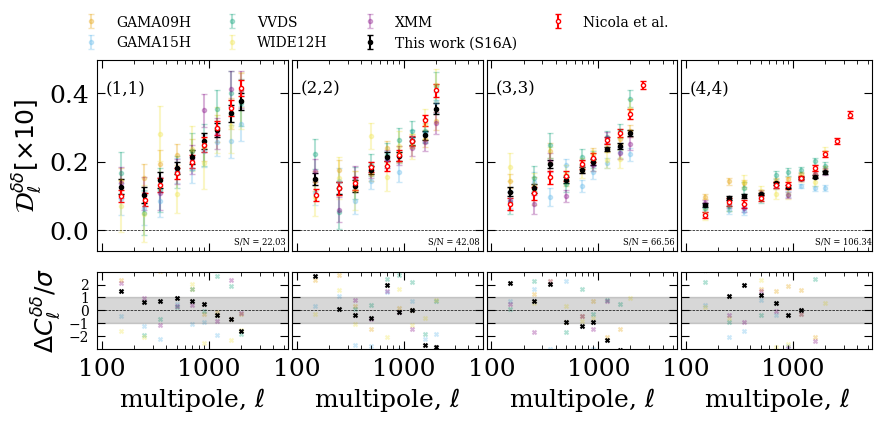

()

In [9]:
hmu.Clustering2pt_plot(fname = fname,
                       labels = labels,
                       add_individual=True,
                       add_combined='ivw_lens_s16a',
                       add_literature=True,
                       show_residual=True,
                       save_fig=True)

##########################################
    Plotting Clustering 2pt functions    
##########################################
>> Number of lens bins:  4
>> Show residuals
>> Initializing figure ...
>> Adding combined measurement for S16A lens sample
>> Reading IVW combined measurements
>> Reading S16A lens sample
>> Computing residuals
>>  Galaxy clustering - Nicola et al.
>> Adding combined measurement for S16A lens sample
>> Reading IVW combined measurements
>> Reading S16A lens sample
>> Computing residuals
>> Adding combined measurement for S16A lens sample
>> Reading IVW combined measurements
>> Reading S16A lens sample
>> Computing residuals
>> Adding combined measurement for S16A lens sample
>> Reading IVW combined measurements
>> Reading S16A lens sample
>> Computing residuals
>>  Galaxy clustering - Nicola et al.
>> Saving figure ...
 Path:  /pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/figures/measurements/clustering


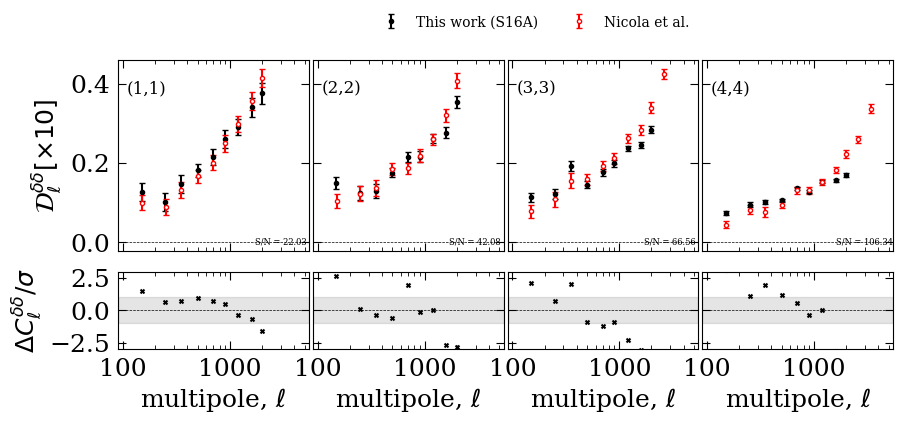

()

In [10]:
hmu.Clustering2pt_plot(fname = fname,
                       labels = labels,
                       add_individual=False,
                       add_combined='ivw_lens_s16a',
                       add_literature=True,
                       show_residual=True,
                       save_fig=True)

#### Clustering with DR1

In [2]:
path = '/pscratch/sd/d/davidsan/txpipe-reanalysis/hsc/outputs/'
fname = [# GAMA09H
         # os.path.join(path,'outputs_gama09h/clustering_HSCPDR1_SNRimagmask_24102023/twopoint_data_fourier.sacc'),
         os.path.join(path,'outputs_gama09h/clustering_HSCPDR1_SNRimagmask_24102023/summary_statistics_fourier.sacc'),
         # # GAMA15H
         # os.path.join(path, 'outputs_gama15h/clustering_HSCPDR1_SNRimagmask_24102023/twopoint_data_fourier.sacc'),
         os.path.join(path, 'outputs_gama15h/clustering_HSCPDR1_SNRimagmask_24102023/summary_statistics_fourier.sacc'),
         # # VVDS
         # os.path.join(path, 'outputs_vvds/clustering_HSCPDR1_SNRimagmask_24102023/twopoint_data_fourier.sacc'),
         os.path.join(path, 'outputs_vvds/clustering_HSCPDR1_SNRimagmask_24102023/summary_statistics_fourier.sacc'),
         # # WIDE12H
         # os.path.join(path, 'outputs_wide12h/clustering_HSCPDR1_SNRimagmask_24102023/twopoint_data_fourier.sacc'),
         os.path.join(path, 'outputs_wide12h/clustering_HSCPDR1_SNRimagmask_24102023/summary_statistics_fourier.sacc'),
         # # XMM
         # os.path.join(path, 'outputs_xmm/clustering_HSCPDR1_SNRimagmask_24102023/twopoint_data_fourier.sacc')
         os.path.join(path, 'outputs_xmm/clustering_HSCPDR1_SNRimagmask_24102023/summary_statistics_fourier.sacc')
         ]
labels = ['GAMA09H','GAMA15H', 'VVDS','WIDE12H', 'XMM']

##########################################
    Plotting Clustering 2pt functions    
##########################################
>> Number of lens bins:  4
>> Show residuals
>> Initializing figure ...
>> Adding individual measurements
>> Plotting  GAMA09H
DV with covariance
Substracting noise
>>  Galaxy clustering - Nicola et al.
>> Plotting  GAMA15H
DV with covariance
Substracting noise
>>  Galaxy clustering - Nicola et al.
>> Plotting  VVDS
DV with covariance
Substracting noise
>>  Galaxy clustering - Nicola et al.
>> Plotting  WIDE12H
DV with covariance
Substracting noise
>>  Galaxy clustering - Nicola et al.
>> Plotting  XMM
DV with covariance
Substracting noise
>>  Galaxy clustering - Nicola et al.
>> Adding combined measurement for DR1 lens sample
>> Reading IVW combined measurements
>> Reading DR1 lens sample
>> Computing residuals
>>  Galaxy clustering - Nicola et al.
>> Adding combined measurement for DR1 lens sample
>> Reading IVW combined measurements
>> Reading DR1 lens samp

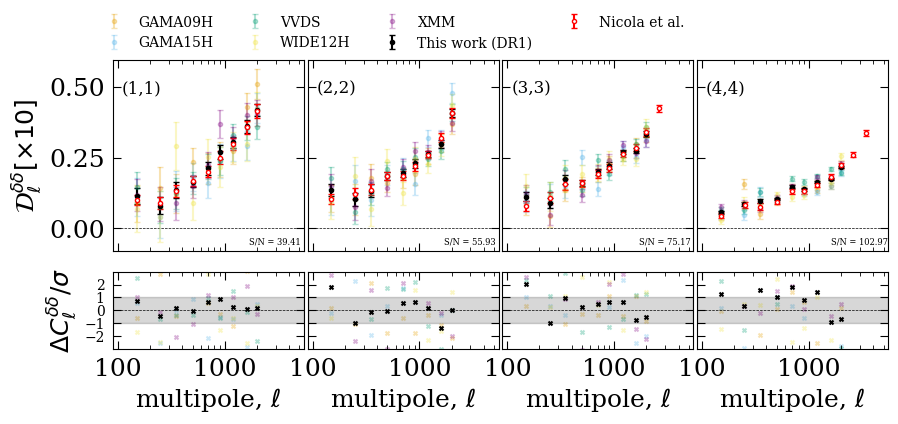

()

In [3]:
hmu.Clustering2pt_plot(fname = fname,
                        labels = labels,
                        add_individual=True,
                        add_combined='ivw_lens_dr1',
                        add_literature=True,
                        show_residual=True,
                        add_byhand = False,
                        save_fig=True)

##########################################
    Plotting Clustering 2pt functions    
##########################################
>> Number of lens bins:  4
>> Show residuals
>> Initializing figure ...
>> Adding combined measurement for DR1 lens sample
>> Reading IVW combined measurements
>> Reading DR1 lens sample
>> Computing residuals
>>  Galaxy clustering - Nicola et al.
>> Adding combined measurement for DR1 lens sample
>> Reading IVW combined measurements
>> Reading DR1 lens sample
>> Computing residuals
>> Adding combined measurement for DR1 lens sample
>> Reading IVW combined measurements
>> Reading DR1 lens sample
>> Computing residuals
>> Adding combined measurement for DR1 lens sample
>> Reading IVW combined measurements
>> Reading DR1 lens sample
>> Computing residuals
>>  Galaxy clustering - Nicola et al.
>> Saving figure ...
 Path:  /pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/figures/measurements/clustering


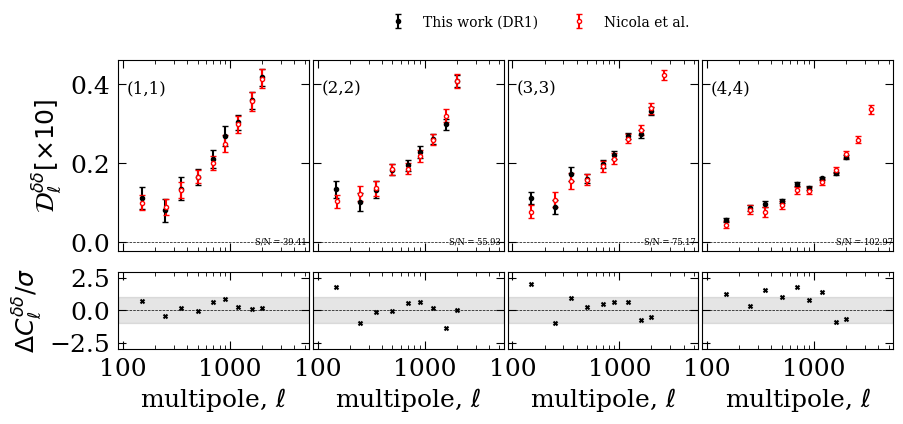

()

In [4]:
hmu.Clustering2pt_plot(fname = fname,
                        labels = labels,
                        add_individual=False,
                        add_combined='ivw_lens_dr1',
                        add_literature=True,
                        show_residual=True,
                        add_byhand = False,
                        save_fig=True)

##########################################
    Plotting Clustering 2pt functions    
##########################################
>> Number of lens bins:  4
>> Do not show residuals
>> Initializing figure ...
>> Adding combined measurement for DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Adding combined measurement for DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Adding combined measurement for DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Adding combined measurement for DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading ALL-FIELDS measurement
>> Reading ALL-FIELDS measurement
>> Reading ALL-FIELDS measurement
>> Reading ALL-FIELDS measurement
>>  Galaxy clustering - Nicola et al.


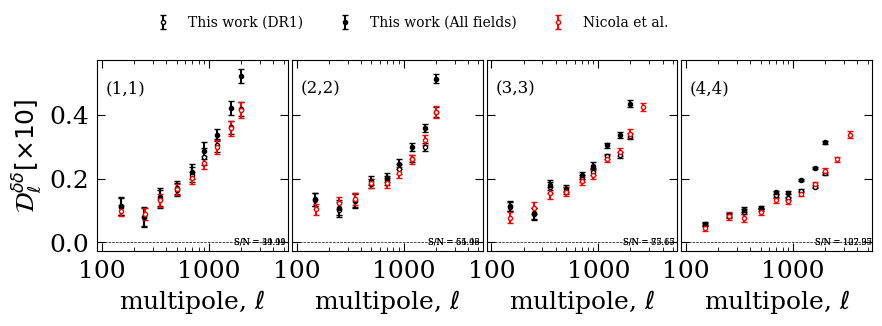

()

In [2]:
hmu.Clustering2pt_plot(fname = [None],
                        labels = [None],
                        add_individual=False,
                        add_allfields=True,
                        add_combined='ivw_lens_dr1',
                        add_literature=True,
                        show_residual=False,
                        add_byhand = False,
                        save_fig=False)

##########################################
    Plotting Clustering 2pt functions    
##########################################
>> Number of lens bins:  4
>> Do not show residuals
>> Initializing figure ...
>> Adding combined measurement for DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Adding combined measurement for DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Adding combined measurement for DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Adding combined measurement for DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading ALL-FIELDS measurement


0 0
[1.70127104e-08 1.42417809e-08 1.46345667e-08 1.45764105e-08
 1.45971364e-08 1.46223231e-08 1.46915769e-08 1.47905473e-08
 1.59116725e-08]
>> Clustering Cells - Removing noise
>> Reading ALL-FIELDS measurement
1 1
[1.64753009e-08 1.37919015e-08 1.41722797e-08 1.41159606e-08
 1.41360318e-08 1.41604228e-08 1.42274890e-08 1.43233331e-08
 1.54090434e-08]
>> Clustering Cells - Removing noise
>> Reading ALL-FIELDS measurement
2 2
[1.71038543e-08 1.43180798e-08 1.47129700e-08 1.46545022e-08
 1.46753391e-08 1.47006607e-08 1.47702856e-08 1.48697862e-08
 1.59969177e-08]
>> Clustering Cells - Removing noise
>> Reading ALL-FIELDS measurement
3 3
[1.63578630e-08 1.36935911e-08 1.40712580e-08 1.40153403e-08
 1.40352685e-08 1.40594857e-08 1.41260738e-08 1.42212347e-08
 1.52992059e-08]
>> Clustering Cells - Removing noise


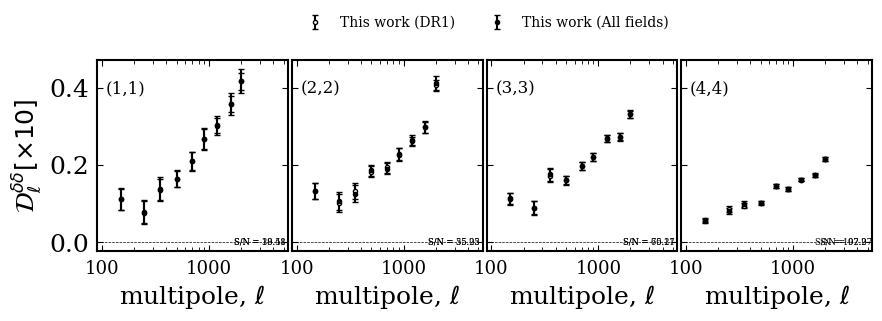

()

In [2]:
hmu.Clustering2pt_plot(fname = [],
                        labels = [],
                        Dell_scaling=True,
                        add_individual=False,
                        add_allfields=True,
                        add_combined='ivw_lens_dr1',
                        add_literature=False,  
                        add_byhand=False,
                        show_residual=False,
                        save_fig=False, 
                        savepath=[])

In [13]:
s = sacc.Sacc.load_fits('/pscratch/sd/d/davidsan/txpipe-reanalysis/hsc/outputs/outputs_all/summary_statistics_fourier.sacc')
s.get_tag("n_ell", data_type="galaxy_density_cl", tracers=(f"lens_0",f"lens_0"))

[1.7012710391923086e-08,
 1.4241780861576704e-08,
 1.4634566700504333e-08,
 1.4576410482885982e-08,
 1.4597136409877437e-08,
 1.4622323085112199e-08,
 1.4691576920118777e-08,
 1.4790547342996806e-08,
 1.5911672511563962e-08]

### Galaxy-galaxy lensing

In [4]:
fname = ['/pscratch/sd/d/davidsan/txpipe-reanalysis/hsc/outputs/outputs_gama09h/summary_statistics_fourier.sacc',
         '/pscratch/sd/d/davidsan/txpipe-reanalysis/hsc/outputs/outputs_gama15h/summary_statistics_fourier.sacc',
         '/pscratch/sd/d/davidsan/txpipe-reanalysis/hsc/outputs/outputs_vvds/summary_statistics_fourier.sacc',
         '/pscratch/sd/d/davidsan/txpipe-reanalysis/hsc/outputs/outputs_wide12h/summary_statistics_fourier.sacc',
         '/pscratch/sd/d/davidsan/txpipe-reanalysis/hsc/outputs/outputs_xmm/summary_statistics_fourier.sacc']
labels = ['GAMA09H',
          'GAMA15H',
          'VVDS',
          'WIDE12H',
          'XMM']

>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combi

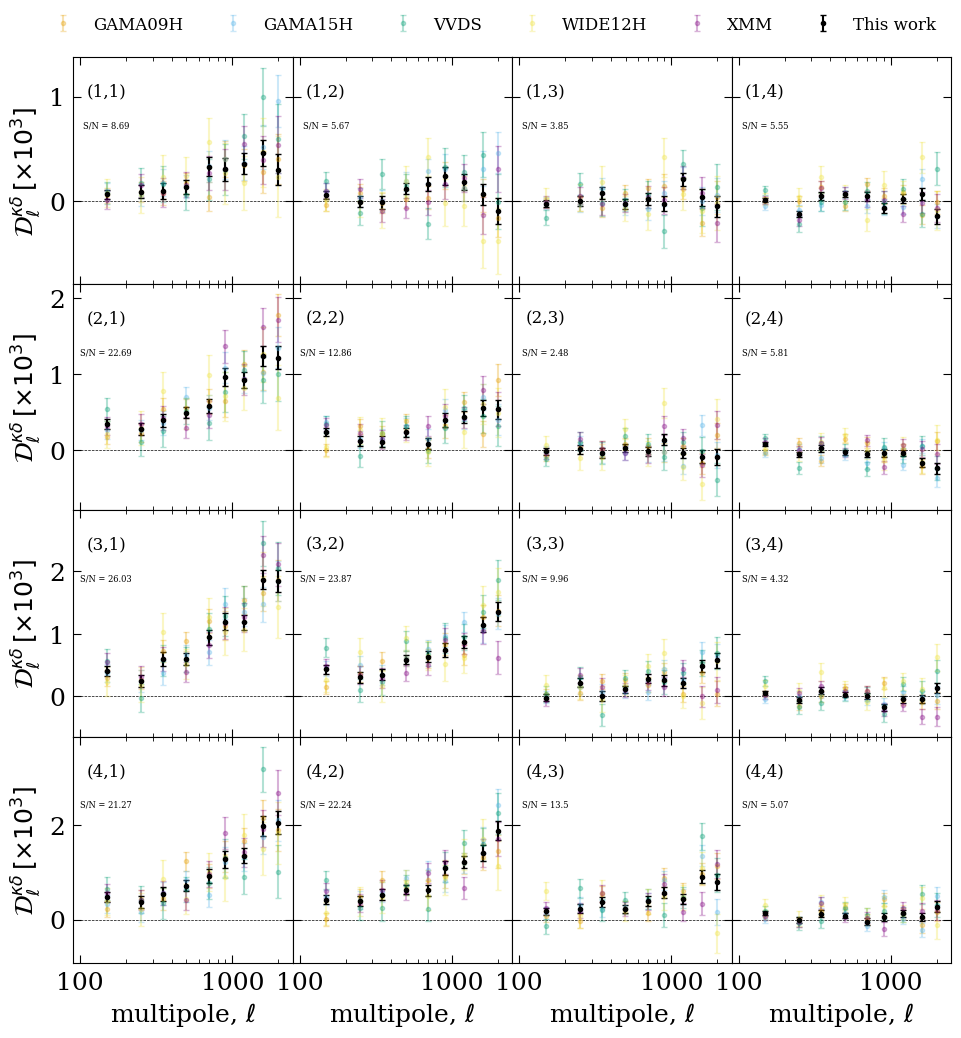

()

In [6]:
hmu.Gammat2pt_plot(fname = fname,
                   labels = labels,
                   add_individual = True,
                   add_combined = 'ivw',
                   theory_fname = None,
                   save_fig=True)

## Covariance

In [ ]:
hmu.Covariance_Plot(s, savefig=True)

## Null-tests

### Cosmic shear B-modes

In [3]:
path_aux = '/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/data/harmonic/txpipe/source_s16a_lens_dr1/all-fields/no-dndz'
fname = os.path.join(path_aux, 'summary_statistics_fourier.sacc')
s = sacc.Sacc.load_fits(fname)

In [4]:
s.get_data_types()

['galaxy_density_cl',
 'galaxy_shearDensity_cl_b',
 'galaxy_shearDensity_cl_e',
 'galaxy_shear_cl_bb',
 'galaxy_shear_cl_be',
 'galaxy_shear_cl_eb',
 'galaxy_shear_cl_ee']

>> FNAME:  /pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/data/harmonic/txpipe/source_s16a_lens_dr1/all-fields/no-dndz/summary_statistics_fourier.sacc


>> Saving figure ...
 Path:  //pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/figures/measurements/null-tests


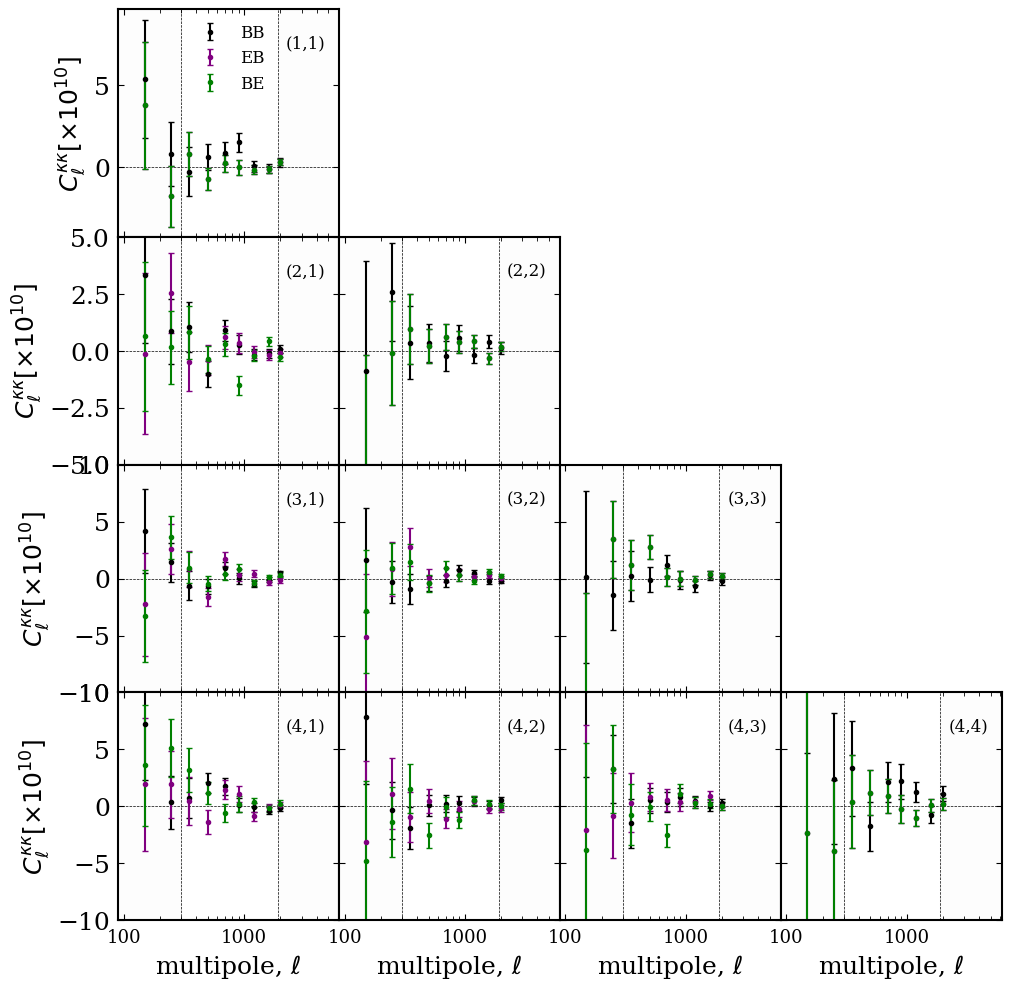

0

In [5]:
hmu.Shear2pt_NullTest_plot(fname = fname,
                            just_auto=False, 
                            save_fig=True, 
                            savepath='/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/figures/measurements/null-tests')

Compute the $\chi^2$ for the null-test of the BB, EB and BE modes

In [5]:
dt_array = ['galaxy_shear_cl_bb',
            'galaxy_shear_cl_be',
            'galaxy_shear_cl_eb',
            'galaxy_shear_cl_ee']


path_aux = '/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/data/harmonic/txpipe/source_s16a_lens_dr1/all-fields/no-dndz'
fname_all = os.path.join(path_aux, 'summary_statistics_fourier.sacc')

print()
print('********************************************')
for data_type in dt_array:
    # Neet to read the whole dv in each iteration
    s = sacc.Sacc.load_fits(fname_all)
    # Compute the chisq for the null-test
    hmu.ComputeChisq_NullTest(s = s, data_type = data_type)
    print()
    print('********************************************')



********************************************


     PREVIOUS TO SCALE CUTS
     chi^2 = 95.6, dof = 90, P = 0.3238092444
     Apply scale cuts
     AFTER CONSIDERING SCALE CUTS
     chi^2 = 68.9, dof = 60, P = 0.2025338060

********************************************
     PREVIOUS TO SCALE CUTS
     chi^2 = 119.4, dof = 90, P = 0.0208101808
     Apply scale cuts
     AFTER CONSIDERING SCALE CUTS
     chi^2 = 88.3, dof = 60, P = 0.0101188554

********************************************
     PREVIOUS TO SCALE CUTS
     chi^2 = 83.0, dof = 90, P = 0.6867001033
     Apply scale cuts
     AFTER CONSIDERING SCALE CUTS
     chi^2 = 65.5, dof = 60, P = 0.2929676645

********************************************
     PREVIOUS TO SCALE CUTS
     chi^2 = 735.4, dof = 90, P = 0.0000000000
     Apply scale cuts
     AFTER CONSIDERING SCALE CUTS
     chi^2 = 618.8, dof = 60, P = 0.0000000000

********************************************


### GGLensing B-modes

In [6]:
path_aux = '/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/data/harmonic/txpipe/source_s16a_lens_dr1/all-fields/no-dndz'
fname = os.path.join(path_aux, 'summary_statistics_fourier.sacc')
s = sacc.Sacc.load_fits(fname)

>> Saving figure ...
 Path:  /pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/figures/measurements/null-tests


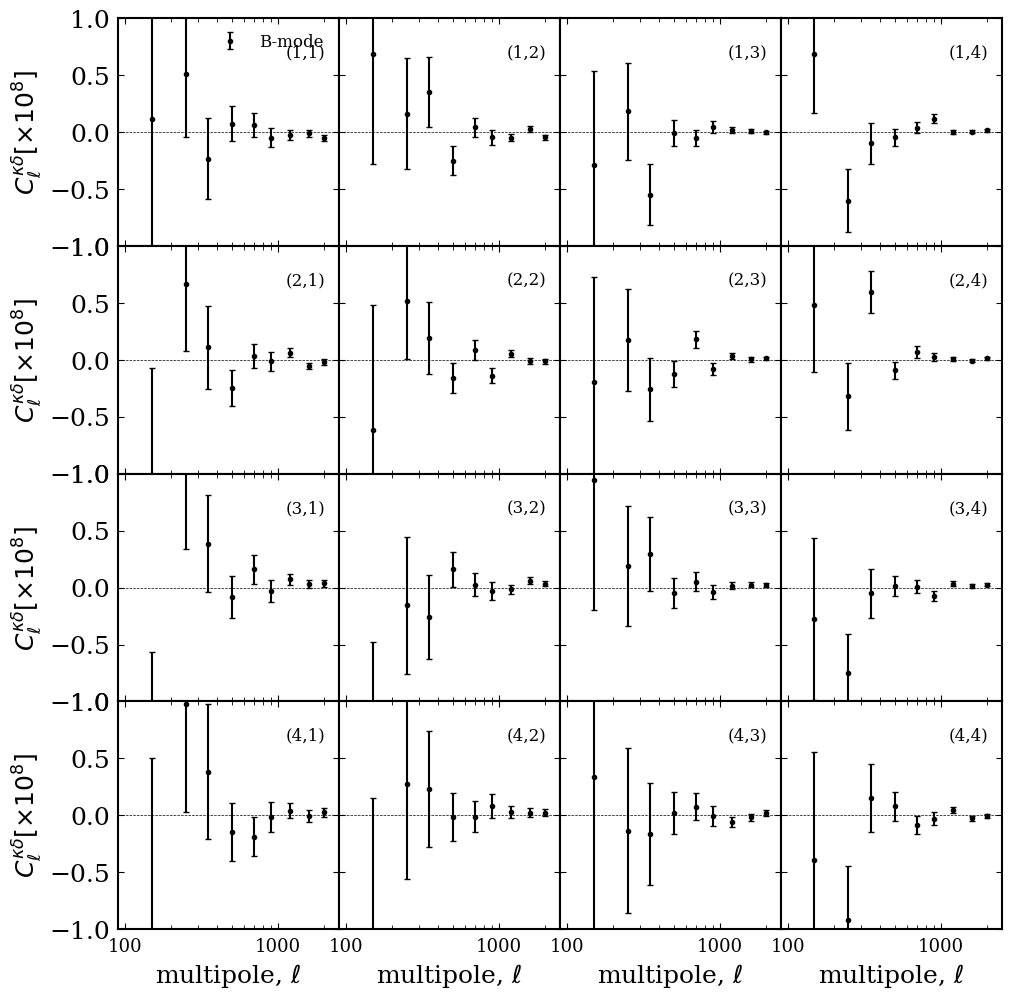

()

In [7]:
hmu.Gammat2pt_NullTest_plot(fname = fname,
                            save_fig=True,
                            savepath='/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/figures/measurements/null-tests')

In [5]:
dt_array = ['galaxy_shearDensity_cl_b']


path_aux = '/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/data/harmonic/txpipe/source_s16a_lens_dr1/all-fields/no-dndz'
fname_all = os.path.join(path_aux, 'summary_statistics_fourier.sacc')

print()
print('********************************************')
for data_type in dt_array:
    # Neet to read the whole dv in each iteration
    s = sacc.Sacc.load_fits(fname_all)
    # Compute the chisq for the null-test
    hmu.ComputeChisq_NullTest(s = s, data_type = data_type)
    print()
    print('********************************************')



********************************************
     PREVIOUS TO SCALE CUTS
     chi^2 = 162.0, dof = 144, P = 0.1447857451

********************************************


## Fiducial data vector check

Galaxy samples are splitted in two:
* Source sample: S16A
* Lens sample: DR1

and our data vector is composed by:
* Redshift distribution: Ephor AB
* Signal: "All-fields" measurement
* Covariance: TJPCov Gauss + SSC

Check that I have introduced the correct data by plotting the redshuft distribution, the signal and the covariance.

In [2]:
path = '/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/data/harmonic/txpipe/source_s16a_lens_dr1/all-fields/dndz'
fname = os.path.join(path, 'summary_statistics_fourier_all_SourcesS16A_LensesDR1_pz_mc_eab_HikageShearSC.sacc')
s = sacc.Sacc.load_fits(fname)

>> Plotting redshift distribution ...


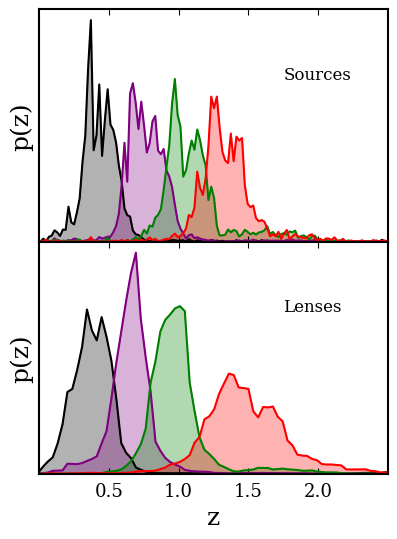

>> Plotting shear signal ...
>>  Cosmic shear - Hikage et al.
>>  Cosmic shear - Nicola et al.


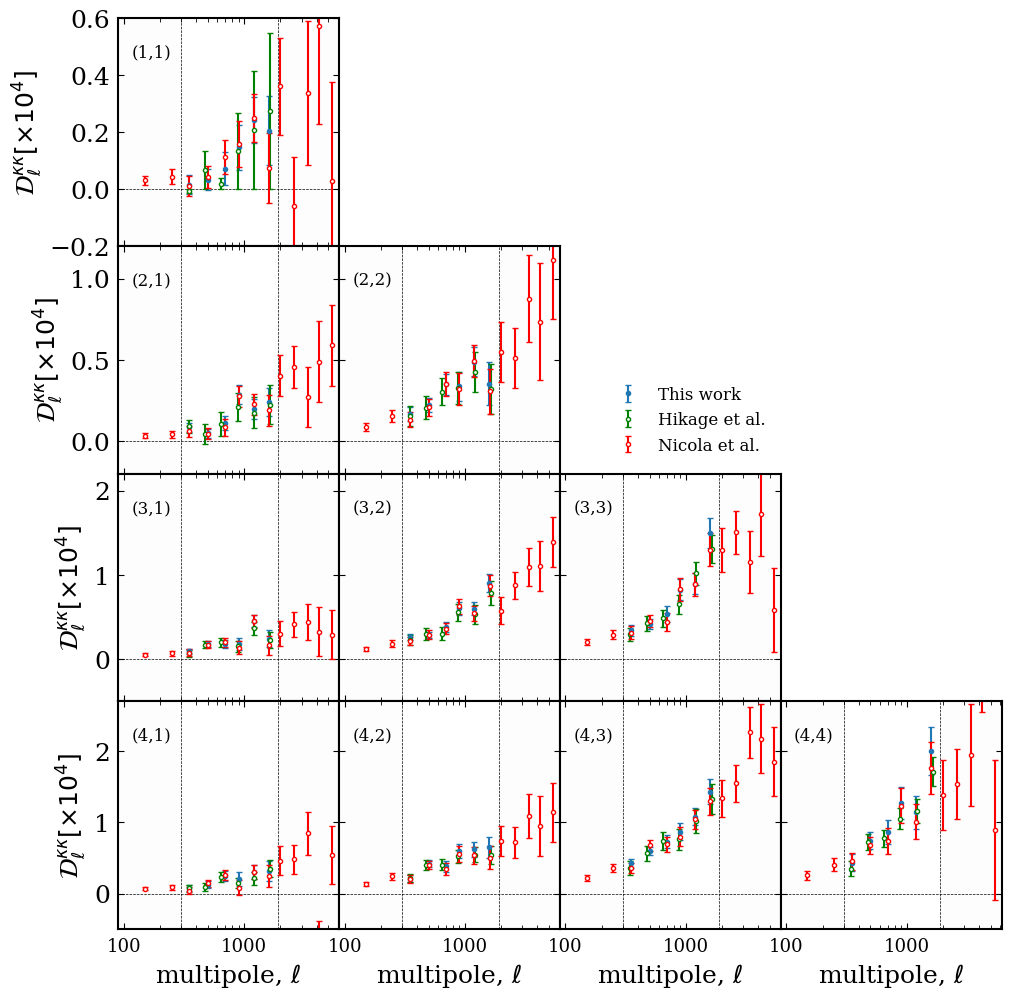

>> Plotting clustering signal ...
##########################################
    Plotting Clustering 2pt functions    
##########################################
>> Number of lens bins:  4
>> Show residuals
>> Initializing figure ...
>> Adding individual measurements
>> Plotting  This work
DV with covariance
Substracting noise
>>  Galaxy clustering - Nicola et al.
>> No combined measurement added
>>  Galaxy clustering - Nicola et al.


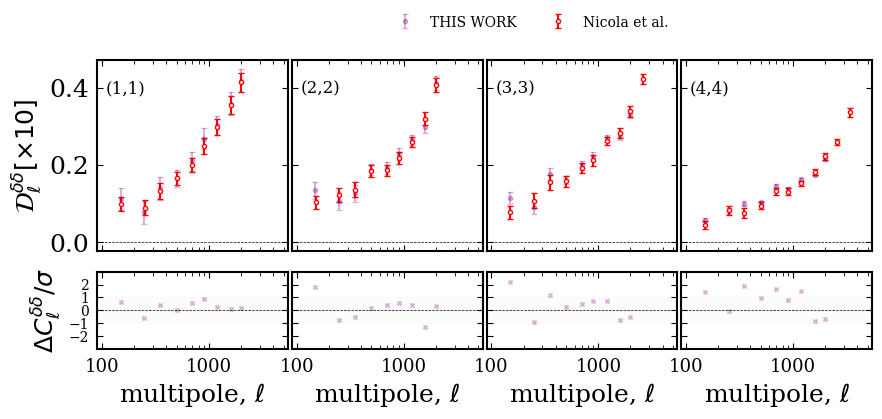

>> Plotting gglensing signal ...


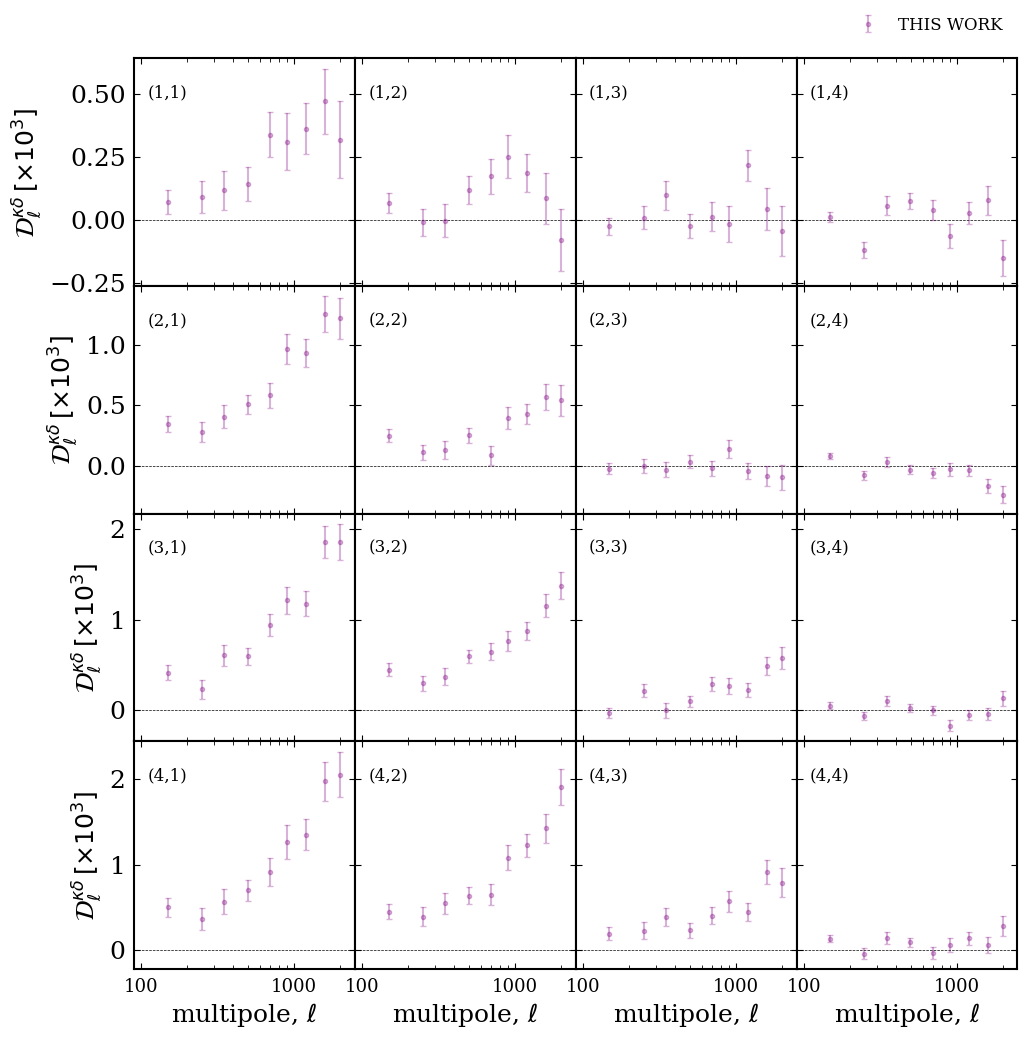

>> Plotting covariance matrix ...


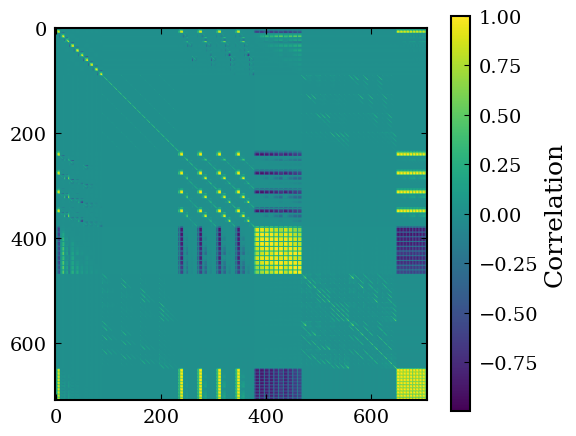

0

In [4]:
hmu.DataVector_Check(fname = fname)